# Importing packages

In [170]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import datetime
import math as ma
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [171]:
dataset = pd.ExcelFile('KPMG_data.xlsx')

dataset.sheet_names
transactions = pd.read_excel('KPMG_data.xlsx', sheet_name = 'Transactions')
customer_demographic = pd.read_excel('KPMG_data.xlsx', sheet_name = 'CustomerDemographic')
customer_address = pd.read_excel('KPMG_data.xlsx', sheet_name = 'CustomerAddress')

# Exploration of the Transaction sheet

In [172]:
transactions.head() #prints the first five rows of the sheet

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,42791,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,42876,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,43024,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,42978,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,43009,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [173]:
transactions.info() #prints the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  int64         
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### The transaction_date is stored as an integer; however, it should be converted to datetime.

In [ ]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], unit='s') 
#converts transcation_date from integer to datetime

transactions['transaction_date'].head()

The dates in this column do not seem very accurate, so further analysis is required to check the validity and acurateness of this column.

In [ ]:
transactions.describe() #prints the statistical information about the dataset

## Checking for missing values

In [ ]:
transactions.isnull().sum() #identifies the missing values

We can either decide to drop the missing values or keep them, based on the purpose of the analysis

## Checking for duplicate values

In [ ]:
dupl_values = transactions.duplicated()
transactions[dupl_values].sum() #prints the number of duplicate values in each column

## Checking columns

In [ ]:
transactions.columns

#### Grouping categories within columns 

In [ ]:
transactions['order_status'].value_counts()

In [ ]:
transactions['brand'].value_counts()

In [ ]:
transactions['product_line'].value_counts()

In [ ]:
transactions['product_class'].value_counts()

In [ ]:
transactions['product_size'].value_counts()

# Exploration of the Customer Demographic sheet

In [ ]:
customer_demographic.head() #prints the first five values in the sheet

In [ ]:
customer_demographic['default'].value_counts()

Values in the default column are not meaningful so can drop the column from the sheet

In [ ]:
customer_demographic = customer_demographic.drop('default', axis=1)

In [ ]:
customer_demographic.head()

In [ ]:
customer_demographic.info()

In [ ]:
customer_demographic.describe()

## Checking for missing values

In [ ]:
customer_demographic.isnull().sum()

We can either keep or decide to drop the missing values, based on the purpose of the dataset

## Checking for duplicate values

In [ ]:
dupl_values = customer_demographic.duplicated()
customer_demographic[dupl_values].sum() #prints the number of duplicate values in each column

## Checking columns

In [ ]:
customer_demographic.columns

In [ ]:
customer_demographic['gender'].value_counts()

Since the gender column has inconsistent values, we need to replace some to match the three main categories

In [ ]:
# Replacing the inconsistent values with the appropriate values
customer_demographic['gender'] = customer_demographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
customer_demographic['gender'].value_counts()

In [ ]:
customer_demographic['job_industry_category'].value_counts()

In [ ]:
customer_demographic['wealth_segment'].value_counts()

In [ ]:
customer_demographic['deceased_indicator'].value_counts()

We only have to consider the 'N' for analysis

# Exploration of the Customer Address sheet

In [ ]:
customer_address.head() #prints the first five rows of the sheet

In [ ]:
customer_address.info() #prints information about the columns in the sheet

# Merging Customer Demographic and Customer Address Sheets 

Since both datasets have the same customer_id column, we can merge the data based on that column

In [ ]:
customer_demographic = pd.merge(customer_demographic, customer_address, how='left', on='customer_id')

In [ ]:
customer_demographic.head()

# Data Analysis Visualizations

## Gender vs Bikes Purchased

In [ ]:
gender = [0,0,0] #first = Female, second = Male, third = Unspecified
for each in customer_demographic['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1
        
print(gender)

def gf(x, pos): # The two args store the value and gender
    return int(x)


bike = [0,0,0] #bikes purchased by F, M, and U respectively 
bike[0] += customer_demographic['past_3_years_bike_related_purchases'][customer_demographic['gender'] == 'Female'].sum() + customer_demographic['past_3_years_bike_related_purchases'][customer_demographic['gender'] == 'F'].sum()
bike[1] += customer_demographic['past_3_years_bike_related_purchases'][customer_demographic['gender'] == 'Male'].sum() + customer_demographic['past_3_years_bike_related_purchases'][customer_demographic['gender'] == 'M'].sum()
bike[2] += customer_demographic['past_3_years_bike_related_purchases'][customer_demographic['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
shade = (0.2 , 0.4 , 0.6 , 0.6)

formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of customers')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = shade)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unspecified', "U's P"))

## Percentage of bikes purchased based on gender

In [ ]:
average  = [0,0,0]
ss = sum(bike)
for i in range(len(average)):
    average[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes purchased by gender')
plt.bar(x1, average, color = shade)
for i in range(len(average)):
    plt.text(x = i-0.15, y = average[i], s = average[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unspecified'))

## Job Industry Category vs Customers

In [ ]:
customer_demographic['job_industry_category'].value_counts() #lists the number of customers per job industry

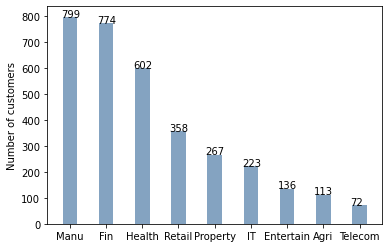

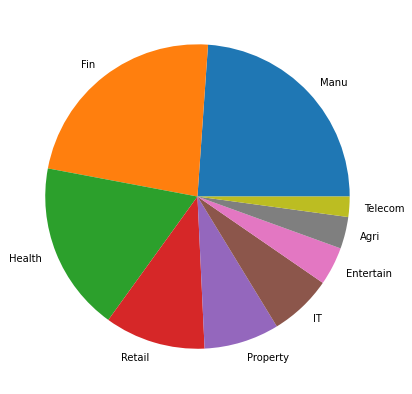

In [176]:
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of customers')
plt.bar(x3, val, color = shade, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Fin", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

#Creating a pie chart
categories = ["Manu", "Fin", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"] 
data = [799, 774, 602, 358, 267, 223, 136, 113, 72]
  
# Creating and showing plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = categories) 
plt.show() 

## Ownership of car vs Customers

In [ ]:
customer_demographic["owns_car"].value_counts()

In [ ]:
val = [2024, 1976]

x3 = np.arange(2)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of customers')
plt.bar(x3, val, color = shade, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Yes", "No"))

## State vs Customers

In [167]:
customer_demographic['state'].value_counts()

NSW                2052
VIC                 939
QLD                 837
New South Wales      86
Victoria             82
Name: state, dtype: int64

([<matplotlib.axis.XTick at 0x1268aae80>,
 [Text(0, 0, 'NSW'), Text(0, 0, 'VIC'), Text(0, 0, 'QLD')])

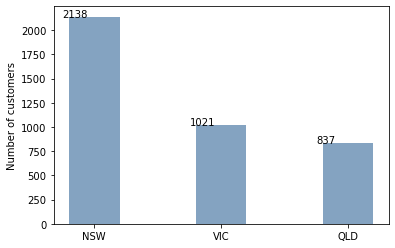

In [178]:
val = [2138, 1021, 837]

x3 = np.arange(3)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of customers')
plt.bar(x3, val, color = shade, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("NSW", "VIC", "QLD"))

## Age Distribution of Customers

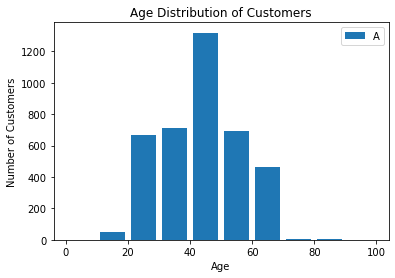

In [180]:
population_ages = customer_demographic['Age']

bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.legend('Age')
plt.show()

## Wealth Segmentation by age category

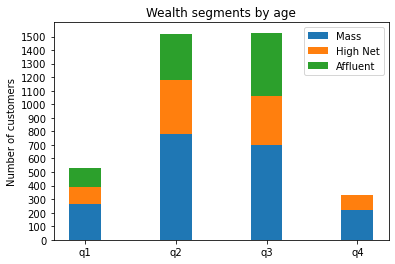

In [184]:
N = 4
ws_mass = [261, 777, 697, 219]
ws_high = [125, 399, 361, 111]
ws_affluent = [146, 346, 470, 0]

bars = np.add(ws_mass, ws_high).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the locations for the groups
width = 0.35       # setting the width of the bars

p1 = plt.bar(ind, ws_mass, width)
p2 = plt.bar(ind, ws_high, width,  bottom = ws_mass)
p3 = plt.bar(ind, ws_affluent, width,  bottom = bars)

plt.ylabel('Number of customers')
plt.title('Wealth segments by age')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4')) #0-24, 25-42, 43-59, 59+
plt.yticks(np.arange(0, 1600, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()